In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ecommerce_furniture_dataset_2024_RAW_DATA.csv")
df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [4]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [6]:
df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


In [7]:
#Checking missing values
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

## Data Cleaning

In [8]:
#remove $ & convert the price & originalPrice colum to a numeric column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True)
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')  #coerce handels NaN values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  487 non-null    float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        1997 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB


In [10]:
#Handeling missing orginalPrie column 
#where the originalPrice is missing, assuming there was no discount - set equal to price

df['originalPrice'] = df['originalPrice'].fillna(df['price'])
df

,productTitle,originalPrice,price,sold,tagText,discount_percent%
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping,NaN
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping,NaN
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping,NaN
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23
...,...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,72.49,72.49,8,Free shipping,NaN
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,276.65,2,Free shipping,NaN
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,196.44,10,Free shipping,NaN
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,228.18,0,Free shipping,NaN


## EDA - Exploratory Data Analysis & Feature Engineering

In [11]:
#Create discount percentage column
df['discount_percent%'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

df['discount_percent%'] = df['discount_percent%'].round(2)
df.head()

,productTitle,originalPrice,price,sold,tagText,discount_percent%
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping,0.00
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping,0.00
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping,0.00
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23


In [12]:
#Now check the clean data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   productTitle       2000 non-null   object 
 1   originalPrice      2000 non-null   float64
 2   price              2000 non-null   float64
 3   sold               2000 non-null   int64  
 4   tagText            1997 non-null   object 
 5   discount_percent%  2000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 93.9+ KB


In [13]:
#Top selling Products

top_selling = df.sort_values(by='sold', ascending=False).head(10)
top_selling[['productTitle','sold']]

,productTitle,sold
1008,Portable round Folding Chair Accordion Chair H...,10000
1391,MUMUCC Multifunctional Foldable And Adjustable...,3000
696,MUMUCC Multifunctional Foldable And Adjustable...,3000
1021,Stylish Shoe Rack Metal Simple Shoe Shelf Foot...,2000
1174,Portability Foot Rest Under Desk Footrest Ergo...,1000
22,Office Furniture Computer Stand 42*26cm Adjust...,1000
1016,"Monitor Stand for 13-32 inches Screens, Dual M...",900
1511,Portable Folding Telescopic Stool Lightweight ...,900
693,Portability Foot Rest Under Desk Footrest Ergo...,900
494,Shoe-shelf Shoerack Multilayer Shoe Rack Shoeb...,700


In [14]:
#Create a acctual_revenue column 

df['acctual_revenue'] = df['price'] * df['sold'] 
df.head()

,productTitle,originalPrice,price,sold,tagText,discount_percent%,acctual_revenue
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping,0.00,28074.00
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping,0.00,0.00
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,276.22
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping,0.00,0.00
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,21.37


In [15]:
df

,productTitle,originalPrice,price,sold,tagText,discount_percent%,acctual_revenue
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping,0.00,28074.00
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping,0.00,0.00
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,276.22
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping,0.00,0.00
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,21.37
...,...,...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,72.49,72.49,8,Free shipping,0.00,579.92
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,276.65,2,Free shipping,0.00,553.30
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,196.44,10,Free shipping,0.00,1964.40
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,228.18,0,Free shipping,0.00,0.00


In [16]:
#now create a potential revenue column & revenue loss due to discount

df['potential_revenue'] = df['originalPrice'] * df['sold']
df['revenue_loss_due_to_discount'] = df['potential_revenue'] - df['acctual_revenue']

In [17]:
df['acctual_revenue'].sum()


np.float64(2181048.07)

In [18]:
df['potential_revenue'].sum()

np.float64(3667703.12)

In [19]:
df['revenue_loss_due_to_discount'].sum()

np.float64(1486655.05)

In [20]:
#remane the tagtextcolumn to shipping_mode
df.rename(columns = {'tagText': 'shipping_mode'}, inplace=True)

In [21]:
# removing the $ from the shippingmode cloumn
df['shipping_mode'] = df['shipping_mode'].replace('[\$,]', '', regex=True)

In [22]:
#Grouping free shipping products

free_shipping_df = df[df['shipping_mode'].str.contains('Free', case=False, na=False)]

In [23]:
#Grouping non free shipping products

paid_shipping_df = df[~df['shipping_mode'].str.contains('Free', case=False, na=False)]

In [24]:
#Calculate the average price for free-shipping products

avg_price_free_shipping = free_shipping_df['price'].mean().round(2)
avg_price_free_shipping

np.float64(163.94)

In [25]:
#Calculate the average price for non-free-shipping products

avg_price_paid_shipping = paid_shipping_df['price'].mean().round(2)
avg_price_paid_shipping

np.float64(40.93)

In [26]:
#Free shipping impact 
df['free_shipping'] = df['shipping_mode'].str.contains('Free', case=False, na=False)

df.groupby('free_shipping')['sold'].mean()

free_shipping
False    21.125000
True     23.644681
Name: sold, dtype: float64

In [27]:
#average sales by Discount Group 
df['discount_range'] = pd.cut(df['discount_percent%'], 
                              bins=[-1, 0, 20, 50 ,100],
                             labels=['0%', '1-20%', '21-50%', '50%+'])

df.groupby('discount_range')['sold'].mean().round(2)

C:\Users\GOURAB PC\AppData\Local\Temp\ipykernel_11636\1695582277.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_range')['sold'].mean().round(2)


discount_range
0%          7.72
1-20%      55.10
21-50%     36.71
50%+      113.74
Name: sold, dtype: float64

## Charts & Visualizations

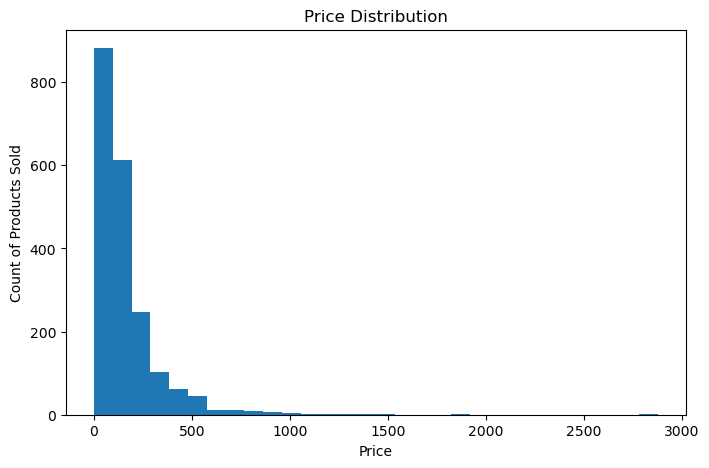

In [28]:
#Price Distribution

plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count of Products Sold")
plt.show()

## Insight:
   This shows that most of the products are selling between (0-500) range.To push the higer priced products company needs to run some offers & adverticement to showcase the quality of product so that company can generate more revenue.

C:\Users\GOURAB PC\AppData\Local\Temp\ipykernel_11636\3713824586.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_trend = df.groupby('price_bin')['sold'].mean()


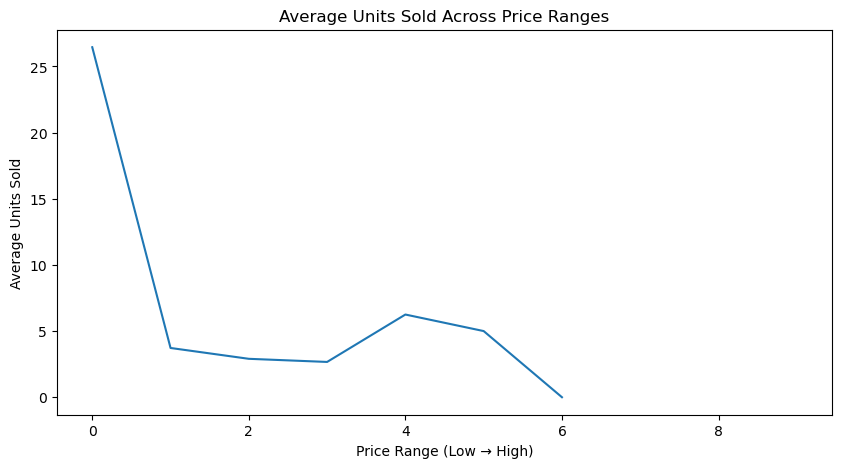

In [55]:
#Relation between Price vs Sales

df['price_bin'] = pd.cut(df['price'], bins=10)

price_trend = df.groupby('price_bin')['sold'].mean()

plt.figure(figsize=(10,5))
plt.plot(price_trend.values)
plt.title("Average Units Sold Across Price Ranges")
plt.xlabel("Price Range (Low → High)")
plt.ylabel("Average Units Sold")
plt.show()


## Insight:
   This trend suggests that competitive pricing is crucial in the furniture e-commerce segment, and bundling strategies such as free shipping or discounts may help higher-priced products improve sales performance.

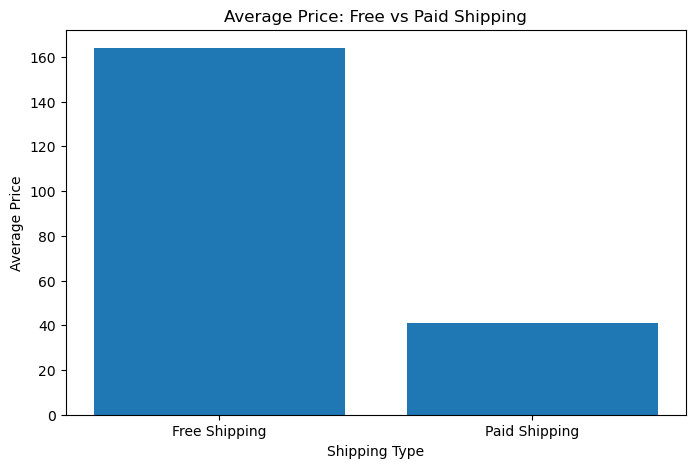

In [30]:
#Comparison Between Free & Paid Shipping 

plt.figure(figsize=(8,5))
plt.bar(["Free Shipping", "Paid Shipping"], [avg_price_free_shipping, avg_price_paid_shipping])
plt.title("Average Price: Free vs Paid Shipping")
plt.xlabel("Shipping Type")
plt.ylabel("Average Price")
plt.show()

## Insight:
   Free Shipping give customers to buy items even though the item price is higher, so by making that a minimum price range for free shipping can generate more sales.

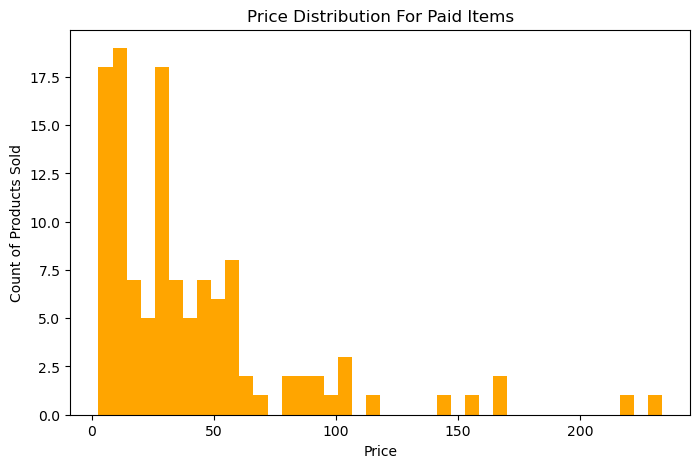

In [31]:
#Price distribution of Paid shipping items

plt.figure(figsize=(8,5))
plt.hist(paid_shipping_df['price'], bins=40, color="Orange")
plt.title("Price Distribution For Paid Items")
plt.xlabel("Price")
plt.ylabel("Count of Products Sold")
plt.show()

## Insight:
   From this we can draw a minimum price cap for Free-Shipping i.e(Price > 25), which can push customers to purchase a larger cart value products, with that the company can generate more revenue.

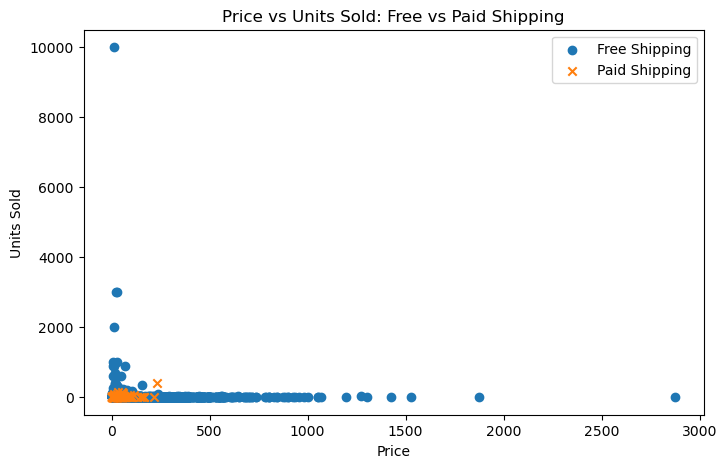

In [32]:
#Price vs Units Sold: Free vs Paid Shipping

plt.figure(figsize=(8,5))
plt.scatter(free_shipping_df['price'], free_shipping_df['sold'], label="Free Shipping")
plt.scatter(paid_shipping_df['price'], paid_shipping_df['sold'], marker='x', label="Paid Shipping")
plt.title("Price vs Units Sold: Free vs Paid Shipping")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

## Insight:
   Free shipping products generally achieve higher sales at similar price points, showing that shipping cost significantly impacts customer purchasing decisions.

C:\Users\GOURAB PC\AppData\Local\Temp\ipykernel_11636\3418959857.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sold_discount = df.groupby('discount_range')['sold'].mean()


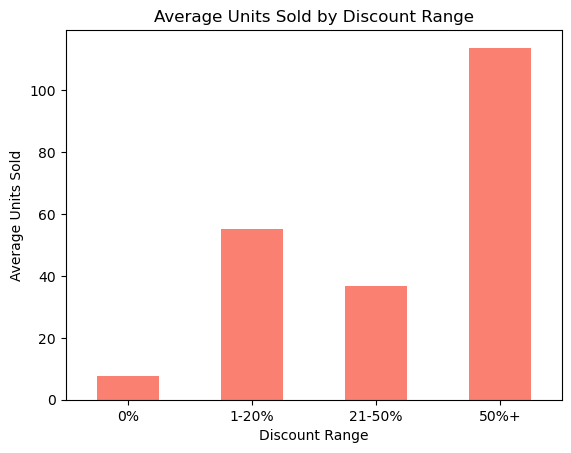

In [37]:
#Average units sold change with discount level

import matplotlib.pyplot as plt

# Calculate average sold per discount range
avg_sold_discount = df.groupby('discount_range')['sold'].mean()

# Plot bar chart
plt.figure()
avg_sold_discount.plot(kind='bar', color='salmon')
plt.title("Average Units Sold by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=0)
plt.show()


## Insight:
  Products with discount_range (50%+) show the highest average sales, indicating that aggressive but controlled discounting maximizes demand without heavily eroding price value.

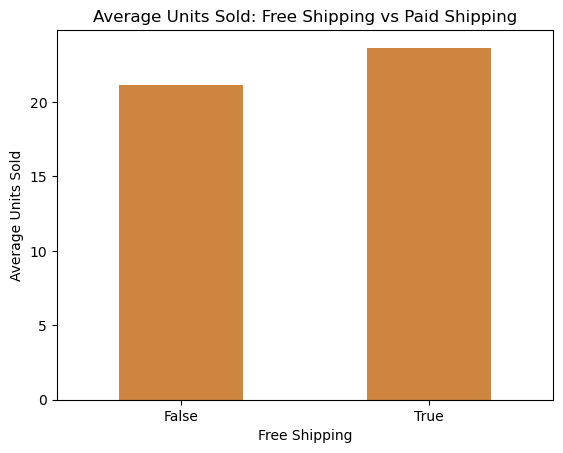

In [51]:
#Average units sold(Free Vs Paid Shipping)

# Calculate average units sold
avg_sold_shipping = df.groupby('free_shipping')['sold'].mean()

# Plot bar chart
plt.figure()
avg_sold_shipping.plot(kind='bar', color='peru')
plt.title("Average Units Sold: Free Shipping vs Paid Shipping")
plt.xlabel("Free Shipping")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=0)
plt.show()


## Insight:
   Products offering free shipping(True) have significantly higher average sales, indicating that shipping cost is a strong conversion driver in e-commerce furniture purchases.

## Key Business Insights:-

1. Free shipping significantly improves sales performance, as products offering free shipping consistently show higher average units sold compared to paid-shipping products.

2. Customers are price-sensitive in the furniture e-commerce segment, with lower-priced products generally achieving higher sales volumes than premium-priced items.

3. Discount ranges (50%+) drive the highest average sales, indicating that balanced discounting is more effective than no or extreme discounts.

4. Free shipping is more common among higher-priced products, suggesting sellers pass logistical costs to customers for bulky or premium furniture items.

5. An optimal pricing window exists in the mid-price range, where products maintain stable demand while preserving reasonable price value.

In [33]:
#Save the dataset

df.to_csv("Cleaned_Furniture_Data.csv", index=False)